In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#1.Loading **Data**

In [3]:
train_data=pd.read_csv('/content/drive/My Drive/mercari/train.tsv',sep='\t')
test_data=pd.read_csv('/content/drive/My Drive/mercari/test.tsv',sep='\t')

In [4]:
print(train_data.shape)
print()
print('Number of datapoints in the train data are {} '.format(train_data.shape[0]))
print()
print('Number of features in the train data are {} '.format(train_data.shape[1]))
print()
print("*"*100)
print(test_data.shape)
print()
print('Number of datapoints in the train data are {} '.format(test_data.shape[0]))
print()
print('Number of features in the train data are {} '.format(test_data.shape[1]))
print()

(1482535, 8)

Number of datapoints in the train data are 1482535 

Number of features in the train data are 8 

****************************************************************************************************
(693359, 7)

Number of datapoints in the train data are 693359 

Number of features in the train data are 7 



#**2.Exploratory Data Analysis** **bold text**


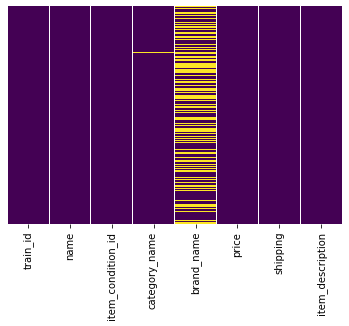

In [5]:
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Observations:
1.   From the heatmap it is clear that there are huge number of missing data points on brand_name and some missing points on category_name



In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   train_id           1482535 non-null  int64  
 1   name               1482535 non-null  object 
 2   item_condition_id  1482535 non-null  int64  
 3   category_name      1476208 non-null  object 
 4   brand_name         849853 non-null   object 
 5   price              1482535 non-null  float64
 6   shipping           1482535 non-null  int64  
 7   item_description   1482531 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 90.5+ MB


Observations:
1. There are four types of numerical data
2. There of them train_id,item_condtion_id,shipping is int and price is in float type
3. The remaining four name,category_name,brand_name,item_description are object type




# 2.1EDA on *price* feature

In [7]:
train_data['price'].describe()

count    1.482535e+06
mean     2.673752e+01
std      3.858607e+01
min      0.000000e+00
25%      1.000000e+01
50%      1.700000e+01
75%      2.900000e+01
max      2.009000e+03
Name: price, dtype: float64

Observations:

1. Average price in the given data is 17 USD
2. Maximum price in the givne data is 2009 USD
3. Minimum price in the given data is 0 USDmeans there are 
4. This might be due to combination offer or an error we should remove it






In [8]:
train_data[train_data['price']==0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 874 entries, 1325 to 1478813
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   train_id           874 non-null    int64  
 1   name               874 non-null    object 
 2   item_condition_id  874 non-null    int64  
 3   category_name      861 non-null    object 
 4   brand_name         528 non-null    object 
 5   price              874 non-null    float64
 6   shipping           874 non-null    int64  
 7   item_description   874 non-null    object 
dtypes: float64(1), int64(3), object(4)
memory usage: 61.5+ KB


Observations:
1. There are a total of 874 columns whose price is zero




In [9]:
train_data=train_data[train_data['price']>0]

In [ ]:
# train_data['length']=train_data['item_description'].str.len()

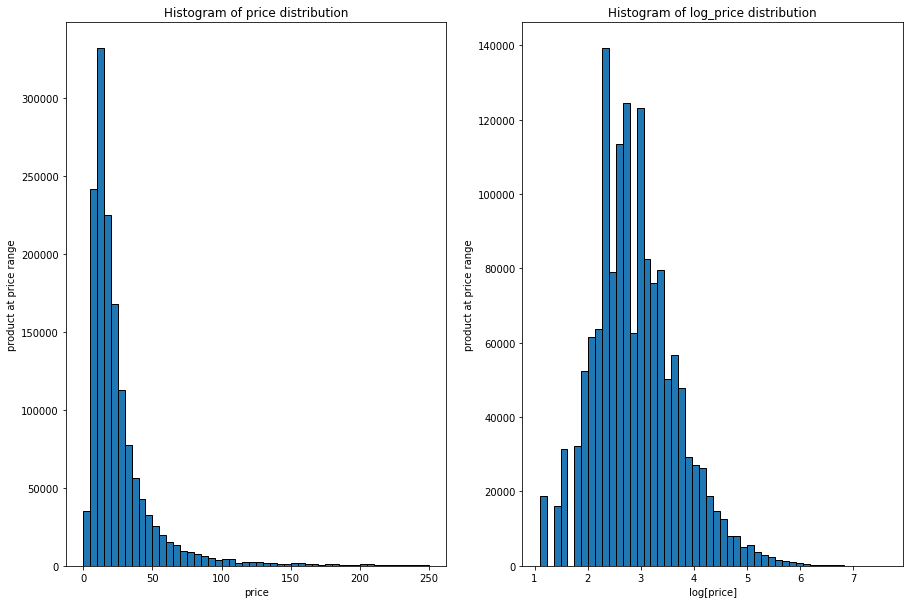

In [10]:
plt.subplot(1,2,1)
train_data['price'].plot.hist(bins=50,edgecolor='black',range=[0,250])
plt.title('Histogram of price distribution')
plt.xlabel('price')
plt.ylabel('product at price range')
plt.subplot(1,2,2)
np.log(train_data['price']).plot.hist(bins=50, figsize=(15,10), edgecolor='black')
plt.title('Histogram of log_price distribution')
plt.xlabel('log[price]')
plt.ylabel('product at price range')
plt.show()

Observations:
1. The plot on the left is having skewness which is right skewed
2. The plot on the right i.e,log[price] is having more  of bellshape



In [11]:
train_data["log_price"] = np.log(train_data["price"] + 1)

2.Item_Conditon_id

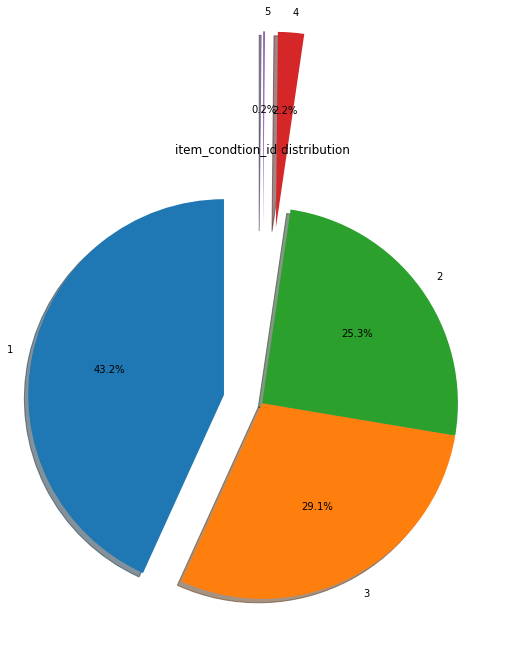

In [12]:
count=train_data['item_condition_id'].value_counts()
labels=count.index
sizes=count
explode=(0.2,0,0,0.9,0.9)
plt.figure(figsize=(10,9))
plt.pie(sizes,explode=explode,labels=labels,autopct='%1.1f%%',shadow=True, startangle=90)
plt.title("item_condtion_id distribution")
plt.show()

Observations:
1. Most repeating item_condition_id is 1 with 43.2%
2. More than 97% of the item_condition_id lies in 1,2 and 3
3. least repeating is 4 and 5 with 2.2% and 0.2%






3.category_name


In [13]:
#https://stackoverflow.com/questions/14745022/how-to-split-a-column-into-two-columns
# train_data.loc[:,('sub_cat1','sub_cat2','sub_cat3','sub_cat4','sub_cat5')]= train_data['category_name'].str.split('/', 0, expand=True)
train_data[['sub_cat1','sub_cat2','sub_cat3','sub_cat4','sub_cat5']] = train_data['category_name'].str.split('/', 0, expand=True)
train_data.head(2)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,log_price,sub_cat1,sub_cat2,sub_cat3,sub_cat4,sub_cat5
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,2.397895,Men,Tops,T-shirts,None,None
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,3.970292,Electronics,Computers & Tablets,Components & Parts,None,None


In [14]:
del train_data['category_name']

In [ ]:
train_data.head(1)

,train_id,name,item_condition_id,brand_name,price,shipping,item_description,sub_cat1,sub_cat2,sub_cat3,sub_cat4,sub_cat5
0,0,MLB Cincinnati Reds T Shirt Size XL,3,NaN,10.0,1,No description yet,Men,Tops,T-shirts,None,None


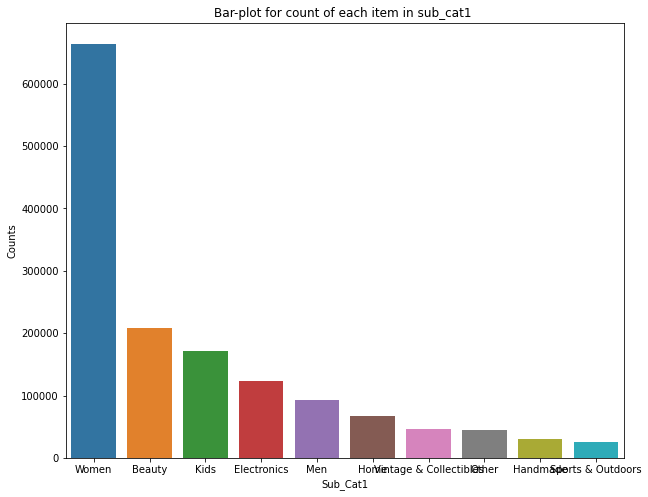

In [15]:
counts=train_data['sub_cat1'].value_counts()
plt.figure(figsize=(10,8))
sns.barplot(counts.index,counts)
plt.title('Bar-plot for count of each item in sub_cat1 ')
plt.xlabel('Sub_Cat1') 
plt.ylabel('Counts') 
plt.show()

Observations:
1. In sub_cat1 most of the products are related to women ,which are more than 600 thousand
2. Top 3 categories in sub_cat1 are Women ,Beauty and Kids



Number of items in sub_cat2 are 113


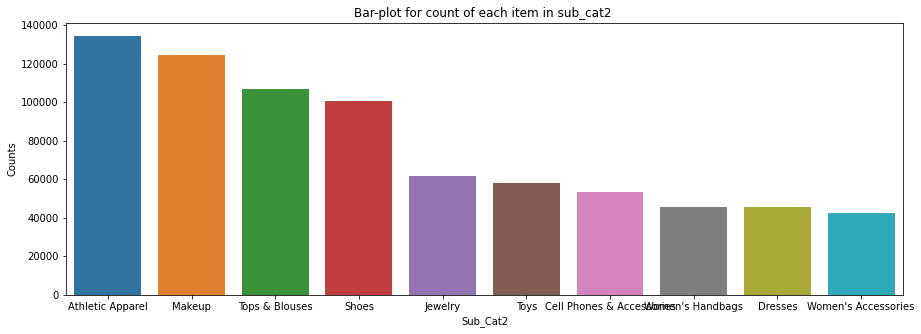

In [16]:
counts=train_data['sub_cat2'].value_counts()
print('Number of items in sub_cat2 are {}'.format(len(counts)))
plt.figure(figsize=(15,5))
sns.barplot(counts.index[:10],counts[:10])
plt.title('Bar-plot for count of each item in sub_cat2 ')
plt.xlabel('Sub_Cat2') 
plt.ylabel('Counts') 
plt.show()

Observations:
1. There are more than 100 items in this category
2. In this sub_cat2 the top features are Athletic Apparel,Makeup,Tops& Blouses



Number of items in sub_cat2 are 870


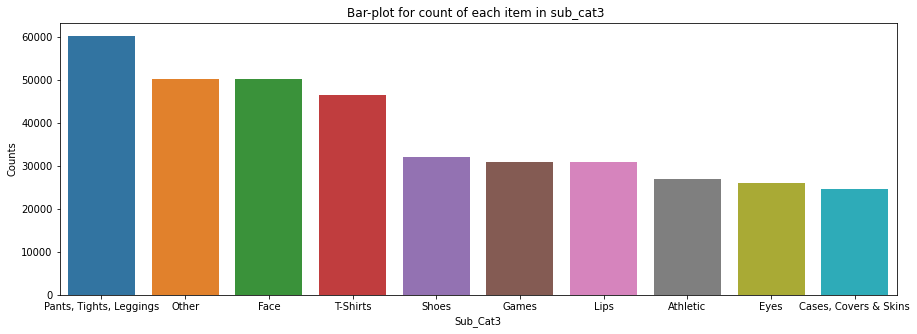

In [17]:
counts=train_data['sub_cat3'].value_counts()
print('Number of items in sub_cat2 are {}'.format(len(counts)))
plt.figure(figsize=(15,5))
sns.barplot(counts.index[:10],counts[:10])
plt.title('Bar-plot for count of each item in sub_cat3 ')
plt.xlabel('Sub_Cat3') 
plt.ylabel('Counts') 
plt.show()

Observations:
1. There are more than 850 items in this category
2. The top features is Pants,Tights,Leggings which are nearly 60000



shipping

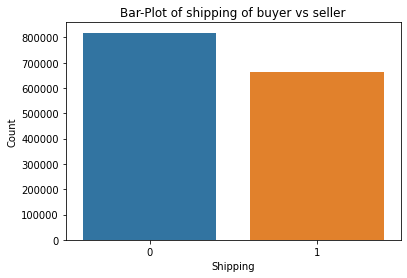

In [18]:
counts=train_data['shipping'].value_counts()
sns.barplot(counts.index,counts)
plt.title('Bar-Plot of shipping of buyer vs seller')
plt.xlabel('Shipping') 
plt.ylabel('Count') 
plt.show()

Observations:
1. Shipping done by id=0 is nearly 800,000 and by id=1 is nearly 65,000
2. shipping id=0 is shipping charges paid by buyer which are more and viceversa

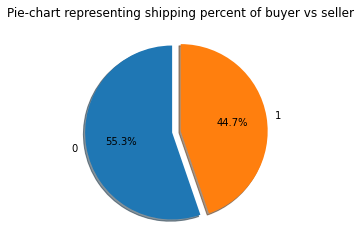

In [19]:
counts=train_data['shipping'].value_counts()
labels=counts.index
sizes=counts
explode=(0.1,0)
plt.figure(figsize=(10,4))
plt.pie(sizes,explode=explode,labels=labels,autopct='%1.1f%%',shadow=True, startangle=90)
plt.title('Pie-chart representing shipping percent of buyer vs seller')
plt.show()

Observations:
1. Out of the total number of products more than 55% of the shipping is paid by the buyer
2. The rest 44.7% is borne by the  seller

brandname

Total brands in brand_name are 4807


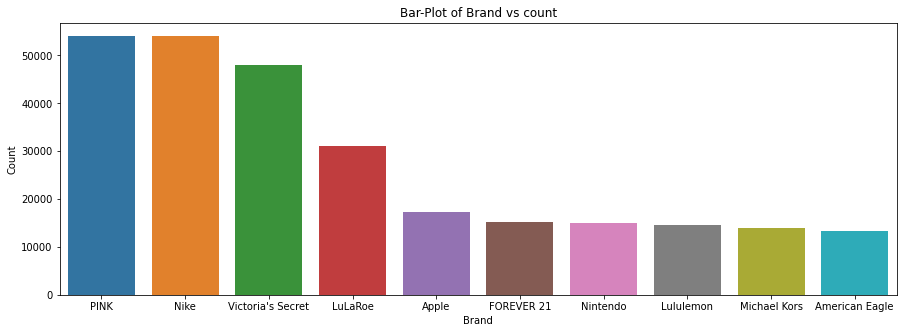

In [20]:
counts=train_data['brand_name'].value_counts()
plt.figure(figsize=(15,5))
sns.barplot(counts.index[:10],counts[:10])
plt.title('Bar-Plot of Brand vs count')
plt.xlabel('Brand') 
plt.ylabel('Count') 
print("Total brands in brand_name are {}".format(len(counts)))
plt.show()

Observations:
1. The total number  of unique brands are more than 4800
2. top brands in this dataset are Pink,Nike and victoria's Secret



Name

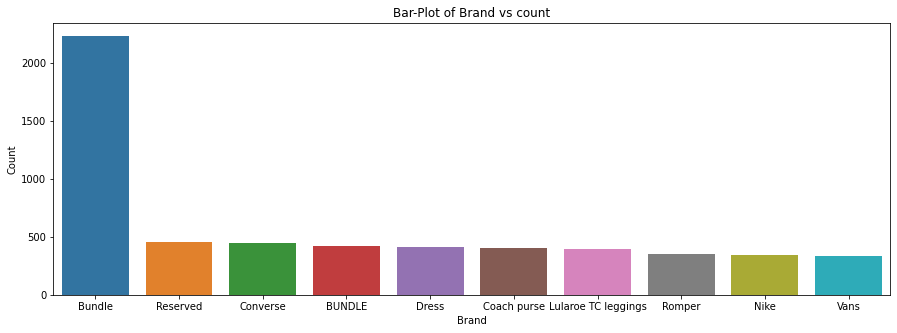

In [21]:
counts=train_data['name'].value_counts()
plt.figure(figsize=(15,5))
sns.barplot(counts.index[:10],counts[:10])
plt.title('Bar-Plot of Brand vs count')
plt.xlabel('Brand') 
plt.ylabel('Count') 
plt.show()

Observations
1. Bundle, Reserved and Converse are the top three names of the product
2. only Bundle name has products more than 2000




shipping vs *log_price*

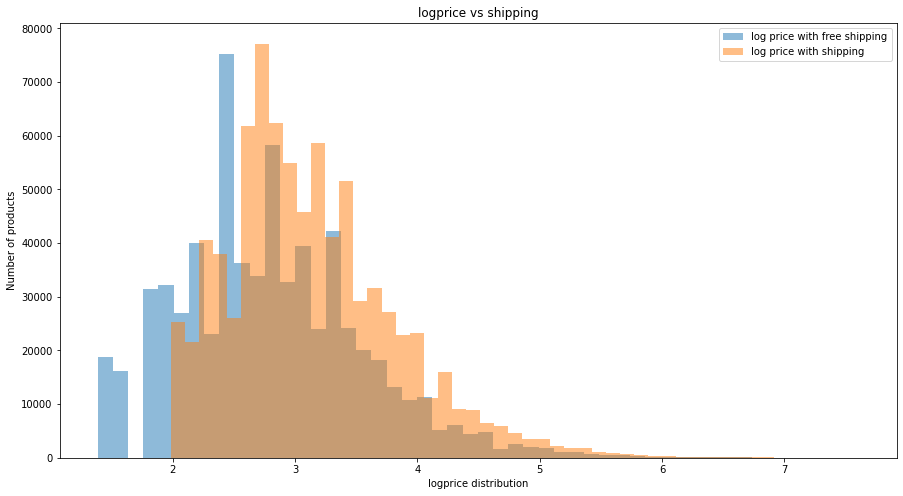

In [22]:
# https://www.kaggle.com/konohayui/mercari-price-suggestion-eda
plt.figure(figsize = (15, 8))
plt.hist(train_data[train_data.shipping == 1].log_price, bins = 50, alpha = 0.5, label = "log price with free shipping")
plt.hist(train_data[train_data.shipping == 0].log_price, bins = 50, alpha = 0.5, label = "log price with shipping")
plt.legend(fontsize = 10)
plt.title('logprice vs shipping')
plt.xlabel('logprice distribution')
plt.ylabel('Number of products')
plt.show()

Observations:
1. most of the histogram plot is mixed
2. between the logprice distribution of 2 and 3 both shipping id 1 and 0 have peaked

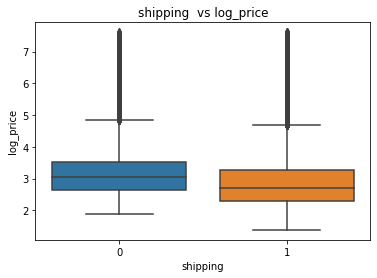

In [23]:
sns.boxplot(x = train_data.shipping, y = train_data.log_price)
plt.title('shipping  vs log_price')
plt.show()

Observations:The median price of shippingid=0 is more than shippingid=1

sub_cat1 vs log_price

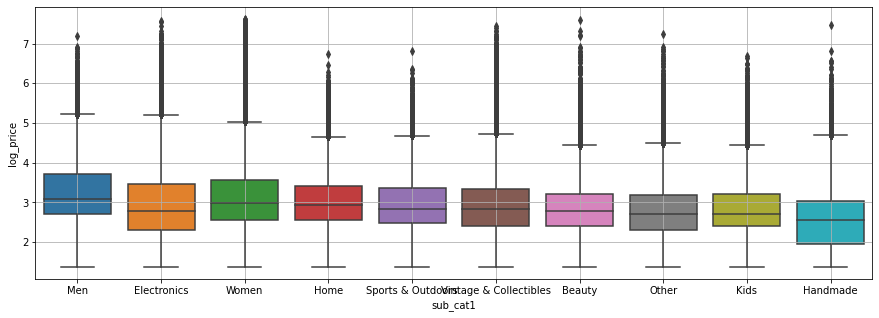

In [26]:
plt.figure(figsize=(15,5))
sns.boxplot(x="sub_cat1", y="log_price", data=train_data) 
plt.grid()
plt.show()

Observations:
1. The most costliest item is present in the women cateogory
2. The median price of the men is more than the other
3. The median price of the Handmade is the least





item_condition_id vs price

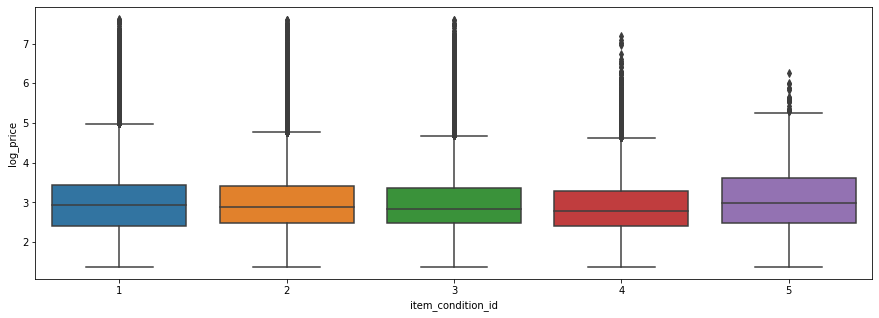

In [25]:
plt.figure(figsize=(15,5))
sns.boxplot(x=train_data['item_condition_id'],y=train_data['log_price'])
plt.show()

Observations:

1. The median price of almost all the item_conditon_id of all the 5 are in same range
2. The median price of the 5th item_condition_id is slightly more than other four 

